In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


df = pd.read_csv('1000random.csv') 
print(df.shape)
df.describe().transpose()

(1000, 24)


,count,mean,std,min,25%,50%,75%,max
size,1000.0,199226.340,846638.455504,0.0,5786.00,28333.0,126320.50,20994814.0
stars,1000.0,39561.415,32451.052917,20578.0,23556.25,29062.5,42029.75,367165.0
forks_count,1000.0,7397.526,9300.397495,391.0,2625.75,4660.0,8277.50,88367.0
open_issues,1000.0,574.623,1451.955884,0.0,49.00,182.0,515.50,24417.0
num_topics,1000.0,7.240,5.727233,0.0,3.00,6.0,10.00,20.0
desc_word_count,1000.0,10.263,9.005383,0.0,5.00,8.0,13.00,168.0
created_at,1000.0,402326.815,27033.366489,335520.0,384131.00,401811.5,421798.75,467503.0
updated_at,1000.0,467980.700,6.621620,467883.0,467981.00,467982.0,467983.00,467983.0
pushed_at,1000.0,467176.769,2519.933003,437595.0,467540.75,467912.0,467977.00,467983.0
has_homepage,1000.0,0.717,0.450682,0.0,0.00,1.0,1.00,1.0


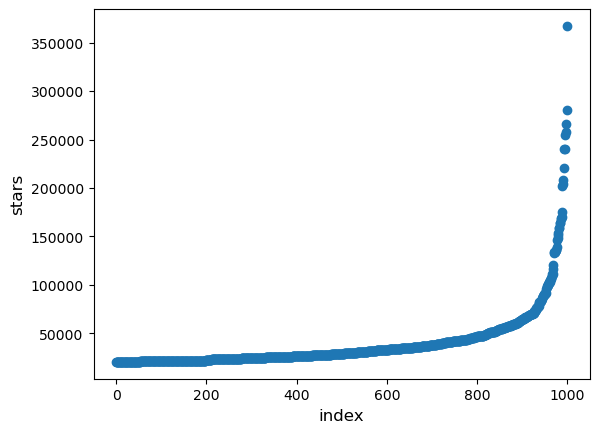

In [2]:
def plot_feature(df, col):
    plt.scatter(range(df.shape[0]), np.sort(df[col].values))
    plt.xlabel('index', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

plot_feature(df, "stars")


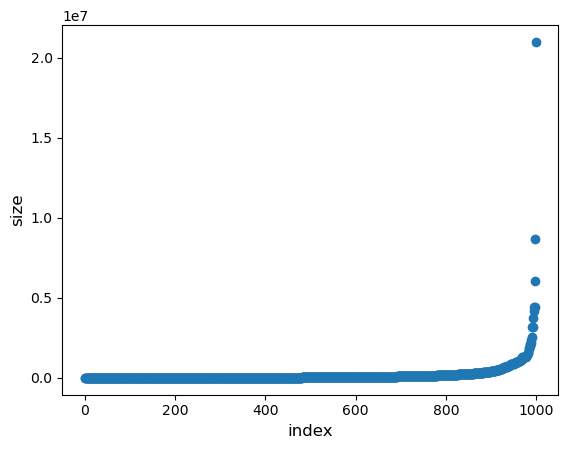

In [3]:
plot_feature(df, "size")

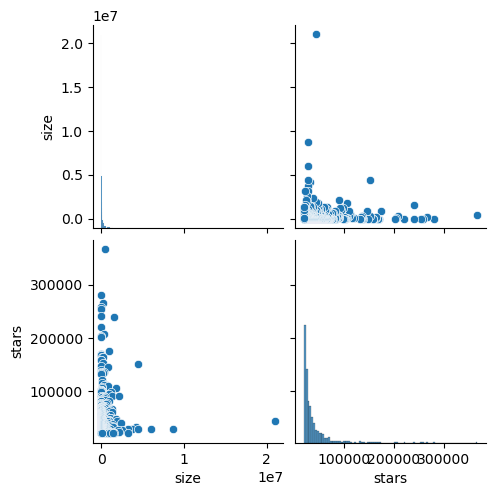

In [4]:
import seaborn as sns

df1 = pd.DataFrame()
df1['size'] = df['size']
df1['stars'] = df['stars']
sns.pairplot(df1)


In [16]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("1000random.csv")
X = df.drop(['stars'], axis=1)
y = df['stars']


# create a base classifier used to evaluate a subset of attributes
model = RandomForestRegressor(n_jobs=-1, n_estimators=200, verbose=1, random_state=42)

# create the RFE model and select amount of features
rfe = RFE(model, n_features_to_select=20)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
#print(rfe.feature_names_in_)


df = pd.read_csv("1000random.csv")
df2 = df.drop(['stars'], axis=1)
n = 0
lis = df2.columns
for i in list(lis):
    if rfe.support_[n] == False:
        df2 = df2.drop([i],axis=1)
        n+=1
    else:
        n+=1
        
Cla = df['stars']


df2['stars'] = Cla
df2.to_csv('1000random_updated.csv')


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1

[ True  True  True  True  True False  True  True False  True False False
  True  True  True  True  True False  True False False False  True]
[1 1 1 1 1 8 1 1 3 1 6 9 1 1 1 1 1 4 1 7 5 2 1]


[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


0                size
16          pushed_at
15         updated_at
14         created_at
13    desc_word_count
7          num_topics
22     remain_license
2         open_issues
1         forks_count
6        has_projects
4           has_pages
3            has_wiki
9          typescript
18        mit_license
12     other_language
21      other_license
8          javascript
17       has_homepage
20     apache_license
10             python
19        nan_license
5          has_issues
11               rust
Name: Features, dtype: object


<Axes: xlabel='Ranking', ylabel='Features'>

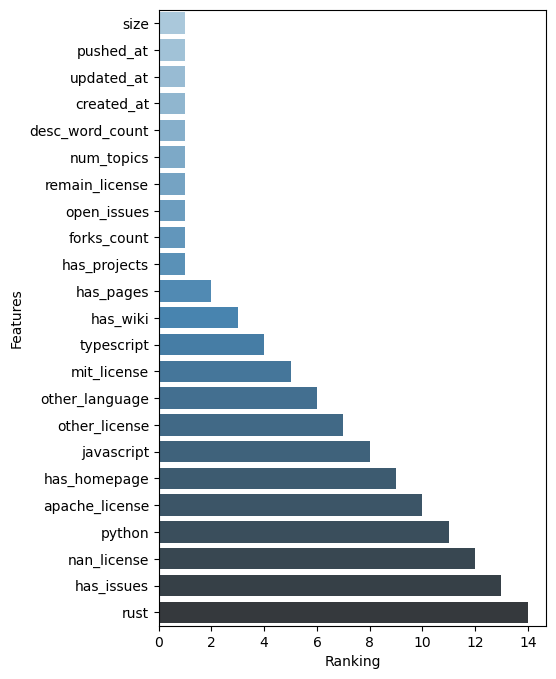

In [14]:
import seaborn as sns
Ranking = rfe.ranking_
Features = rfe.feature_names_in_
df = pd.DataFrame({"Features":Features,"Ranking":Ranking})
orders=df.sort_values('Ranking').Features
print(orders)

plt.figure(figsize=(5,8))
sns.barplot(x='Ranking', y="Features", data=df, order=df.sort_values('Ranking').Features, palette="Blues_d")